## Table of Content

### 1. Import Libraries
### 2. Loading dataset
### 3. Label Encoding
### 4. EDA
### 5. Model Traning and feature selection
### 6. Model Evaluation
### 7. Confusion Matrix
### 8. Conclusion

## 1. Import Libraries

In [1]:
# !pip install -r requirement1.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 2. Loading dataset

In [3]:
df = pd.read_csv('SPAM.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## 3. Label Encoding

In [5]:
label_encoder = preprocessing.LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['Category'].value_counts()

0    4825
1     747
Name: Category, dtype: int64

## 4. EDA

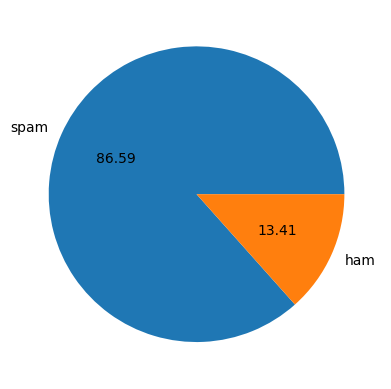

In [7]:
plt.pie(df['Category'].value_counts(),labels=['spam','ham'],autopct='%0.2f')
plt.show()

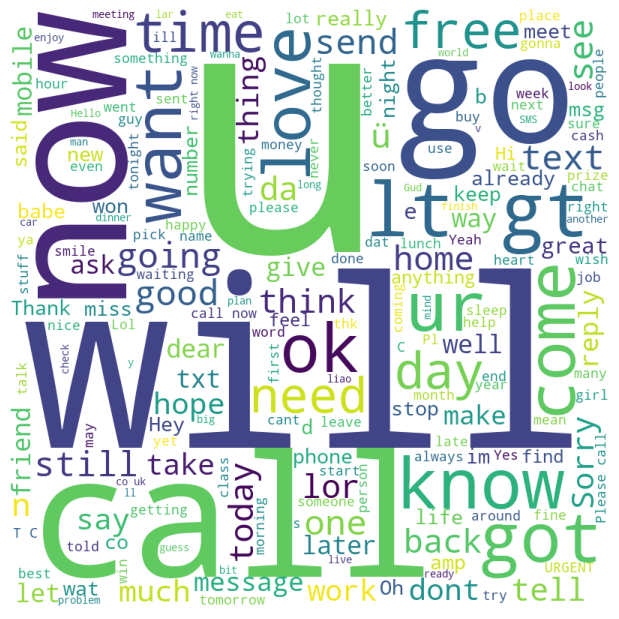

In [8]:
msg = "".join(df.Message)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(msg)


# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## 5. Model Traning and feature selection

## What is TF - IDF?

###  TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

### Term Frequency: 

     In document d, the frequency represents the number of instances of a given word t. Therefore, we can see that it becomes more relevant when a word appears in the text, which is rational. Since the ordering of terms is not significant, we can use a vector to describe the text in the bag of term models. For each specific term in the paper, there is an entry with the value being the term frequency.
     
   ## tf(t,d) = count of t in d / number of words in d
     
### Document Frequency: 

    This tests the meaning of the text, which is very similar to TF, in the whole corpus collection. The only difference is that in document d, TF is the frequency counter for a term t, while df is the number of occurrences in the document set N of the term t. In other words, the number of papers in which the word is present is DF.
    
  ## df(t) = occurrence of t in documents
  
### Inverse Document Frequency: 

     Mainly, it tests how relevant the word is. The key aim of the search is to locate the appropriate records that fit the demand. Since tf considers all terms equally significant, it is therefore not only possible to use the term frequencies to measure the weight of the term in the paper. First, find the document frequency of a term t by counting the number of documents containing the term:
     
     df(t) = N(t)
     where
        df(t) = Document frequency of a term t
        N(t) = Number of documents containing the term t
        
### Usually, the tf-idf weight consists of two terms:-

    1. Normalized Term Frequency (tf)
    2. Inverse Document Frequency (idf)
 
    tf-idf(t, d) = tf(t, d) * idf(t)

In [9]:
x = df['Message']
y = df['Category']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [11]:
vectorizer = TfidfVectorizer()
x_train_tf = vectorizer.fit_transform(x_train.values)
x_test_tf = vectorizer.transform(x_test.values)

In [12]:
x_train_tf.toarray()[:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
from sklearn.metrics import accuracy_score

new_model = MultinomialNB()
new_model.fit(x_train_tf, y_train)

pred = new_model.predict(x_test_tf)
accuracy_score(y_test, pred)

0.9605263157894737

In [14]:
clf = Pipeline([
    ('vectorizer' , TfidfVectorizer()),
    ('nb' , MultinomialNB())
])

In [15]:
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('nb', MultinomialNB())])

In [16]:
clf.score(x_test, y_test)

0.9605263157894737

## 6. Model Evaluation

In [17]:
print('Accuracy Score: ', accuracy_score(y_test, pred))

Accuracy Score:  0.9605263157894737


In [18]:
print('Precision Score: ', precision_score(y_test, pred))

Precision Score:  1.0


In [19]:
print('Recall Score: ', recall_score(y_test, pred))

Recall Score:  0.7013574660633484


In [20]:
print('F1 Score: ', f1_score(y_test, pred))

F1 Score:  0.8244680851063829


In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1451
           1       1.00      0.70      0.82       221

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



## 7. Confusion Matrix

In [22]:
cm = confusion_matrix(y_test, pred)
cm

array([[1451,    0],
       [  66,  155]])

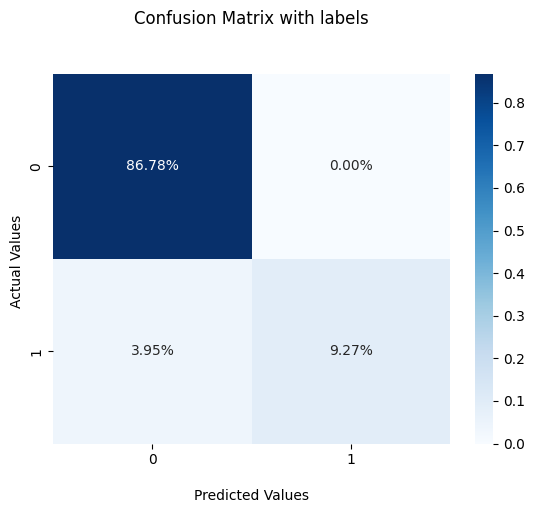

In [23]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

## 8. Conclusion

### In this project analysis of message spam and not spam using Naive Byes TF - IDF. And Evaluation and confusion matrix.